In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Resolution selection for tx and tl

In [9]:
tx = pd.read_csv("~/stellar-clustering/network/Community Detection/Louvian/transaction_graph/resolution_selection_normalized_summary.csv")
tl = pd.read_csv("~/stellar-clustering/network/Community Detection/Louvian/trustline_graph/resolution_selection_normalized_summary.csv")

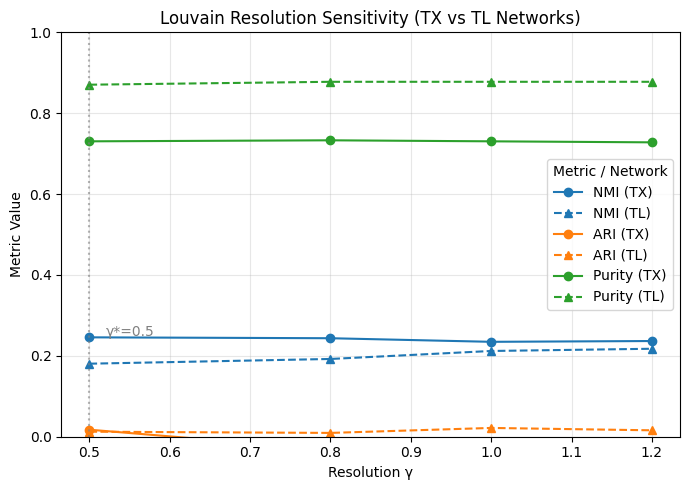

In [10]:

metrics = ["NMI", "ARI", "Purity"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"] 

plt.figure(figsize=(7, 5))

for metric, color in zip(metrics, colors):
    plt.plot(tx["resolution"], tx[metric], marker='o', color=color, label=f"{metric} (TX)")
    plt.plot(tl["resolution"], tl[metric], marker='^', color=color, linestyle='--', label=f"{metric} (TL)")


best_gamma = tx.loc[tx["NMI"].idxmax(), "resolution"]
plt.axvline(best_gamma, color='gray', linestyle=':', alpha=0.6)
plt.text(best_gamma + 0.02, 0.25, f"γ*={best_gamma}", color='gray')

plt.title("Louvain Resolution Sensitivity (TX vs TL Networks)")
plt.xlabel("Resolution γ")
plt.ylabel("Metric Value")
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.legend(title="Metric / Network", loc="best")
plt.tight_layout()
plt.show()


## cross validation

In [11]:
tx = pd.read_csv("transaction_graph/resolution_selection_normalized_summary_1.csv")
tl = pd.read_csv("trustline_graph/resolution_selection_normalized_summary.csv")

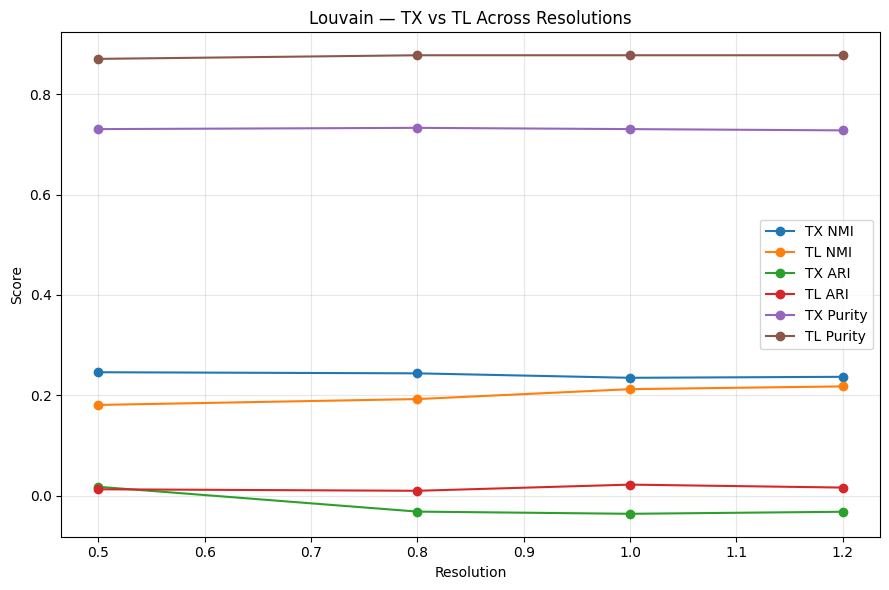

In [16]:
metrics = ["NMI", "ARI", "Purity"]

plt.figure(figsize=(9,6))
for m in metrics:
    plt.plot(tx["resolution"], tx[m], marker="o", label=f"TX {m}")
    plt.plot(tl["resolution"], tl[m], marker="o", label=f"TL {m}")

plt.xlabel("Resolution")
plt.ylabel("Score")
plt.title("Louvain — TX vs TL Across Resolutions")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

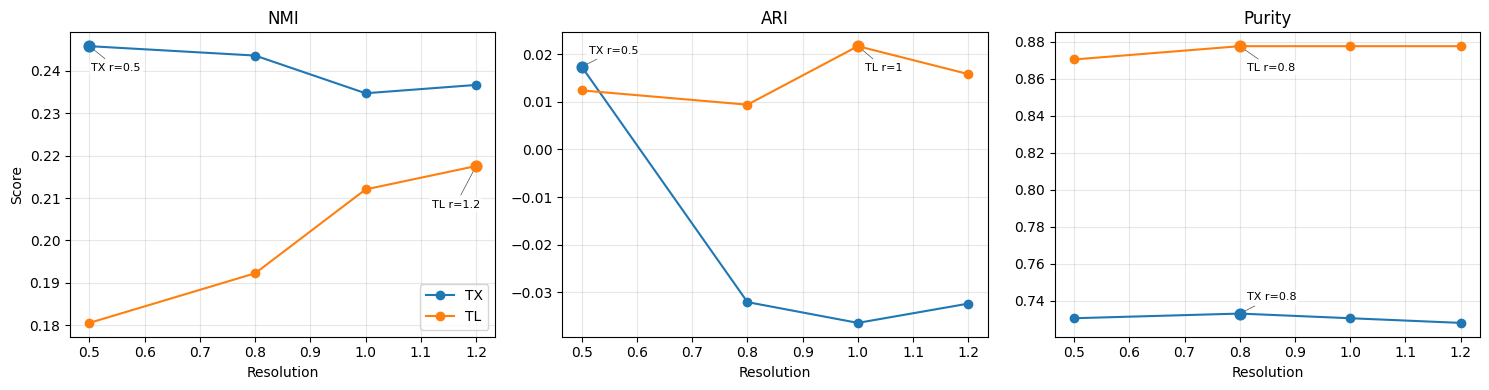

In [ ]:
metrics = ["NMI", "ARI", "Purity"]

fig, axes = plt.subplots(1, 3, figsize=(15,4), sharex=True)

for ax, m in zip(axes, metrics):
    ax.plot(tx["resolution"], tx[m], marker="o", label="TX")
    ax.plot(tl["resolution"], tl[m], marker="o", label="TL")
    ax.set_title(m)
    ax.set_xlabel("Resolution")
    ax.grid(True, alpha=0.3)

    idx_tx = tx[m].idxmax()
    best_tx_res = tx.loc[idx_tx, "resolution"]
    best_tx_val = tx.loc[idx_tx, m]

    idx_tl = tl[m].idxmax()
    best_tl_res = tl.loc[idx_tl, "resolution"]
    best_tl_val = tl.loc[idx_tl, m]

    ax.scatter([best_tx_res], [best_tx_val], s=60, zorder=5)
    ax.scatter([best_tl_res], [best_tl_val], s=60, zorder=5)

    if m == "NMI":
        ax.annotate(
            f"TX r={best_tx_res:g}",
            xy=(best_tx_res, best_tx_val),
            xycoords="data",
            xytext=(0.05, 0.90),
            textcoords="axes fraction",
            fontsize=8,
            ha="left", va="top",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.8),
            arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.7),
        )

        ax.annotate(
            f"TL r={best_tl_res:g}",
            xy=(best_tl_res, best_tl_val),
            xycoords="data",
            xytext=(0.85, 0.45),
            textcoords="axes fraction",
            fontsize=8,
            ha="left", va="top",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.8),
            arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.7),
        )
    else:
        ax.annotate(
            f"TX r={best_tx_res:g}",
            xy=(best_tx_res, best_tx_val),
            xytext=(5, 8),
            textcoords="offset points",
            fontsize=8,
            ha="left", va="bottom",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.8),
            arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.7),
        )

        ax.annotate(
            f"TL r={best_tl_res:g}",
            xy=(best_tl_res, best_tl_val),
            xytext=(5, -12),
            textcoords="offset points",
            fontsize=8,
            ha="left", va="top",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.8),
            arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.7),
        )

axes[0].set_ylabel("Score")
axes[0].legend()

plt.tight_layout()
plt.show()
